In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    fit_and_score_iteratively, plot_validation_curve_with_undersampling
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from scipy.io import arff

with open('1year.arff','r') as f:
    data1, meta1 = arff.loadarff(f)
    data1 = np.asarray(data1.tolist(), dtype=np.float32)
    print(data1.shape)

with open('2year.arff','r') as f:
    data2, meta2 = arff.loadarff(f)
    data2 = np.asarray(data2.tolist(), dtype=np.float32)
    print(data2.shape)

with open('3year.arff','r') as f:
    data3, meta3 = arff.loadarff(f)
    data3 = np.asarray(data3.tolist(), dtype=np.float32)
    print(data3.shape)

with open('4year.arff','r') as f:
    data4, meta4 = arff.loadarff(f)
    data4 = np.asarray(data4.tolist(), dtype=np.float32)
    print(data4.shape)

with open('5year.arff','r') as f:
    data5, meta5 = arff.loadarff(f)
    data5 = np.asarray(data5.tolist(), dtype=np.float32)
    print(data5.shape)


(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [3]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)
data[np.isnan(data)] = 0

X, y = data[:,:-1], data[:, -1]

print(f'X.shape={X.shape}, y.shape={y.shape}')

X.shape=(43405, 64), y.shape=(43405,)


# Naive fit

In [17]:
# No undersampling
classifier = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=0)
res = fit_and_score_iteratively(classifier, X, y, None, iterations=1)
print(res)


[0.97250806 0.63092784 0.89212828 0.48803828 0.7425266 ]


In [18]:
# Undersampling to 1:1 and iteration 10x
classifier = GradientBoostingClassifier(n_estimators=100, max_depth=10, random_state=0)
res = fit_and_score_iteratively(classifier, X, y, 1, iterations=10)
print(res)


a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.86358566 0.86516594 0.8551493  0.87559809 0.86359522]


# Model Tuning

param=1
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=16
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=49
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=100
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=169
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=256
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=361
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=484
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=625
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=784
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=961
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=1156
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.04085872576

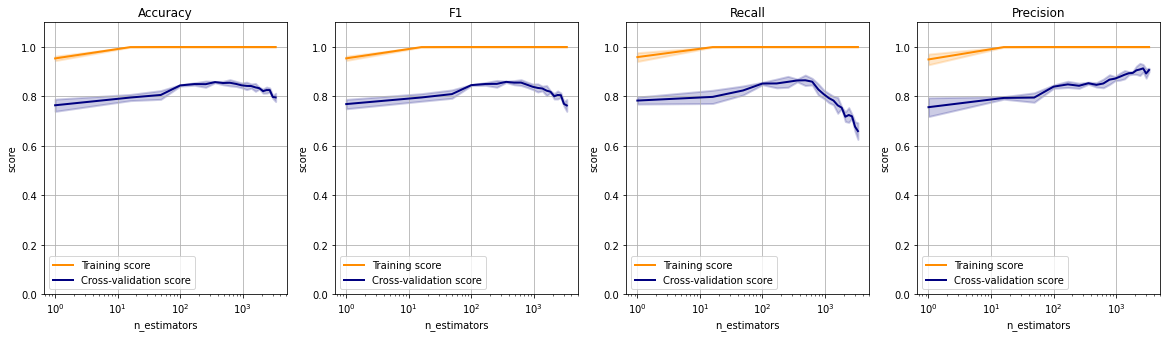

In [20]:
# optimize number of weak classifiers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_range = list(exp_range(1, 60, 3, 2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, max_depth=10)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=True)


In [34]:
results_store

{'fit_time': array([[1.00000000e+00, 2.37127542e-02, 5.28556313e-04],
        [1.60000000e+01, 3.48789096e-01, 7.81545831e-03],
        [4.90000000e+01, 1.07940418e+00, 4.79169103e-03],
        [1.00000000e+02, 2.21919167e+00, 1.23937911e-02],
        [1.69000000e+02, 3.84238297e+00, 3.43919109e-02],
        [2.56000000e+02, 6.34206074e+00, 7.30594336e-01],
        [3.61000000e+02, 9.12016207e+00, 1.19960965e+00],
        [4.84000000e+02, 1.27314255e+01, 1.35753911e+00],
        [6.25000000e+02, 2.03086982e+01, 4.16874694e-02],
        [7.84000000e+02, 2.53346832e+01, 1.28784899e-01],
        [9.61000000e+02, 3.04187493e+01, 7.74443030e-02],
        [1.15600000e+03, 3.70323444e+01, 1.13140248e+00],
        [1.36900000e+03, 4.36358277e+01, 4.07453596e-01],
        [1.60000000e+03, 5.21669378e+01, 3.71979181e-01],
        [1.84900000e+03, 6.05870417e+01, 7.30727976e-02],
        [2.11600000e+03, 7.27098646e+01, 1.59020157e+00],
        [2.40100000e+03, 8.54101375e+01, 5.93424732e-01],
  

param=1
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=16
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=49
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=100
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=169
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=256
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=361
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=484
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=625
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=784
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=961
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=1156
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.04085872576

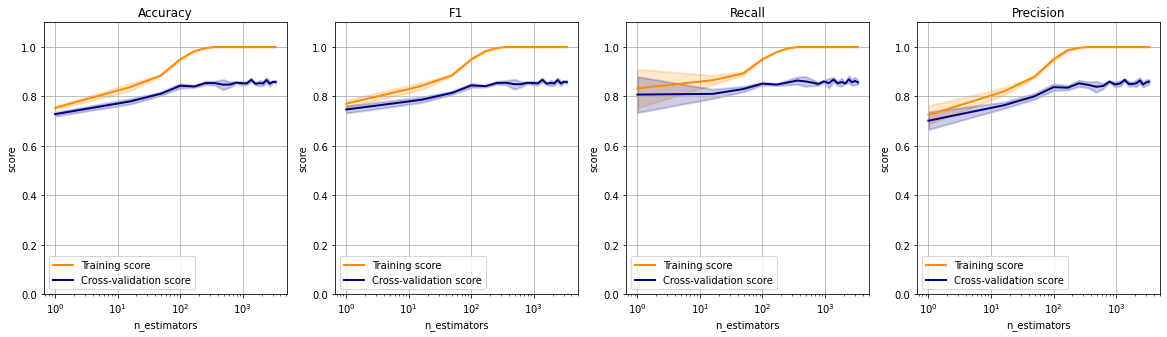

In [33]:
# optimize number of weak classifiers after setting max_depth = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_range = list(exp_range(1, 60, 3, 2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, max_depth=3)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='n_estimators', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=True)


In [23]:
# Undersampling to 1:1 and iteration 10x
classifier = GradientBoostingClassifier(n_estimators=625, max_depth=10, random_state=0)
res = fit_and_score_iteratively(classifier, X, y, 1, iterations=3)
print(res)


a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.87011952 0.87177552 0.86088756 0.88304094 0.87012981]


param=1
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=3
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=5
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=7
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=9
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=11
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=13
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=15
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=17
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=19
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


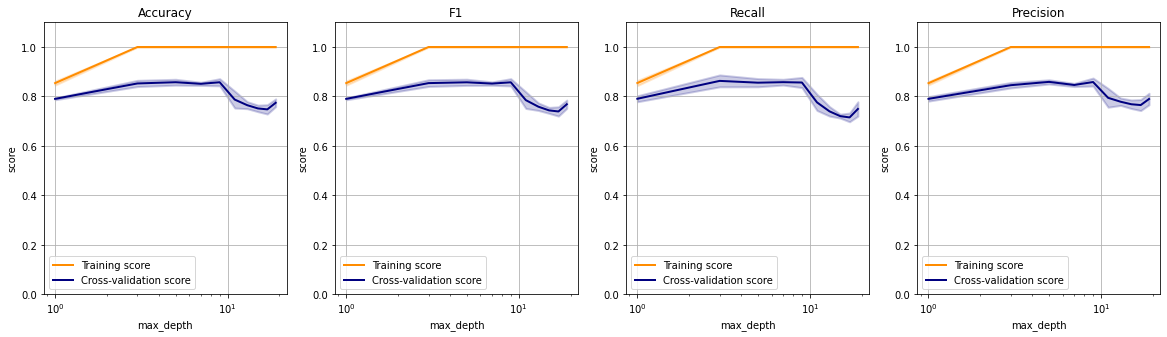

In [24]:
# optimize tree max depth with n_estimators=625

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_range = range(1, 21, 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=625)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='max_depth', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=True)


In [25]:
results_store

{'fit_time': array([[ 1.        ,  6.16984731,  0.41014161],
        [ 3.        , 15.99533534,  0.48015599],
        [ 5.        , 27.88427615,  0.12102102],
        [ 7.        , 39.97737575,  1.65579691],
        [ 9.        , 55.20434535,  0.77479707],
        [11.        , 63.40618086,  2.54138167],
        [13.        , 64.28545797,  0.6305433 ],
        [15.        , 61.37571329,  4.11204336],
        [17.        , 57.55863816,  2.10756924],
        [19.        , 58.68814194,  3.34785317]]),
 'score_time': array([[1.00000000e+00, 1.06727481e-02, 2.80710686e-04],
        [3.00000000e+00, 3.08045745e-02, 2.42919884e-02],
        [5.00000000e+00, 2.57975459e-02, 7.43877188e-04],
        [7.00000000e+00, 3.76461744e-02, 9.59024109e-04],
        [9.00000000e+00, 9.56992507e-02, 7.43828827e-02],
        [1.10000000e+01, 1.10793531e-01, 8.08577776e-02],
        [1.30000000e+01, 6.58725500e-02, 7.87204760e-04],
        [1.50000000e+01, 6.30235672e-02, 3.70160921e-03],
        [1.7000000

param=2
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=7
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=12
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=17
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=22
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=27
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=32
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=37
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=42
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=47
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=52
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=57
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=

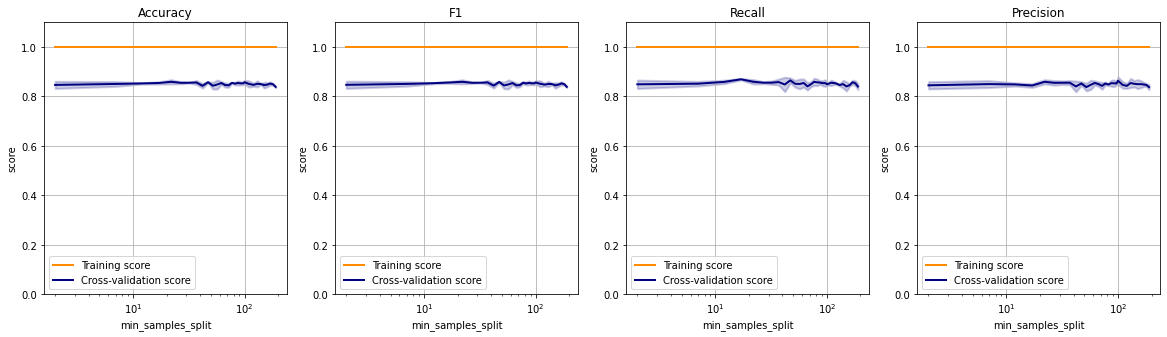

In [27]:
# optimize min samples split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_range = list(range(2, 100, 5)) + list(range(100, 200, 10))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=625)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='min_samples_split', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=True)


In [32]:
# Undersampling to 1:1 and 3x iteration
classifier = GradientBoostingClassifier(n_estimators=625, min_samples_split=20, random_state=0)
res = fit_and_score_iteratively(classifier, X, y, 1, iterations=3)
print(res)


a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.87144754 0.87162737 0.86979409 0.87347156 0.87144915]


param=2
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=7
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=12
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=17
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=22
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=27
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=32
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=37
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=42
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=47
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=52
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=57
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=

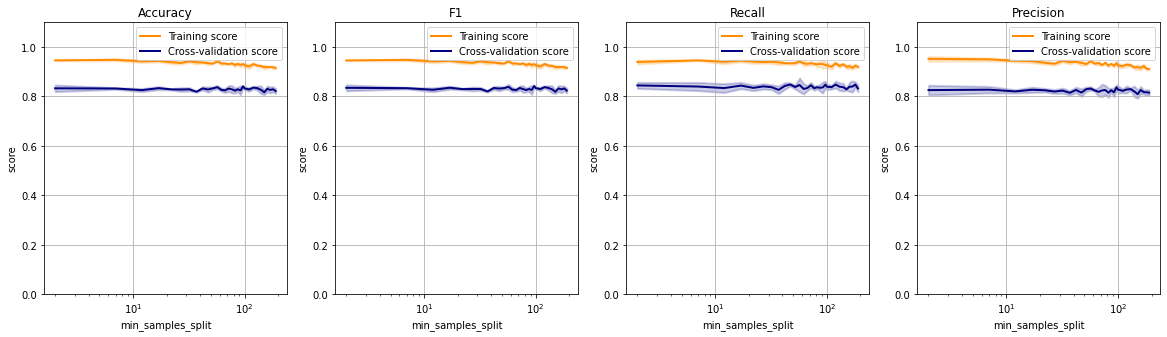

In [28]:
# optimize min samples split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_range = list(range(2, 100, 5)) + list(range(100, 200, 10))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=100)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='min_samples_split', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=True)


param=2
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=7
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=12
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=17
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=22
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=27
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=32
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=37
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=42
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=47
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=52
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=57
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=

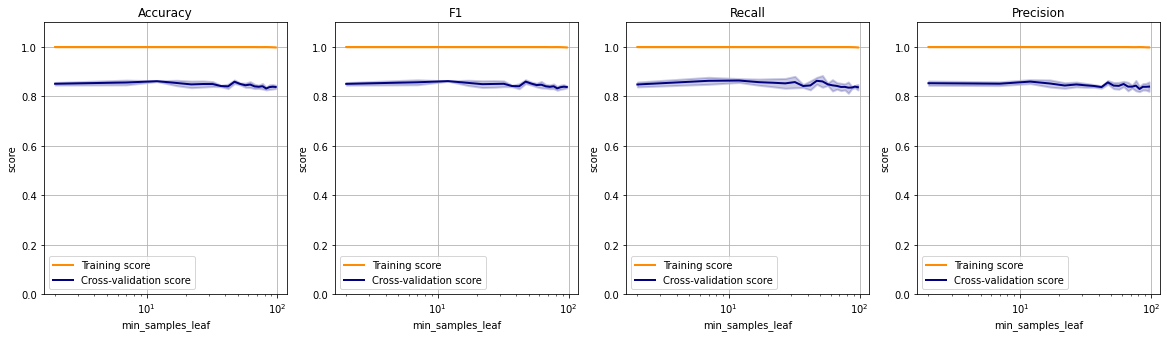

In [30]:
# optimize min samples leaf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

param_range = range(2, 100, 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=625)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='min_samples_leaf', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=True)


In [ ]:
# Undersampling to 1:1 and iteration 10x
classifier = GradientBoostingClassifier(n_estimators=625, min_samples_split=11, random_state=0)
res = fit_and_score_iteratively(classifier, X, y, 1, iterations=3)
print(res)


param=0.0
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.01
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.02
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.03
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.04
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.05
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.06
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.07
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.08
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.09
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=0.1
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


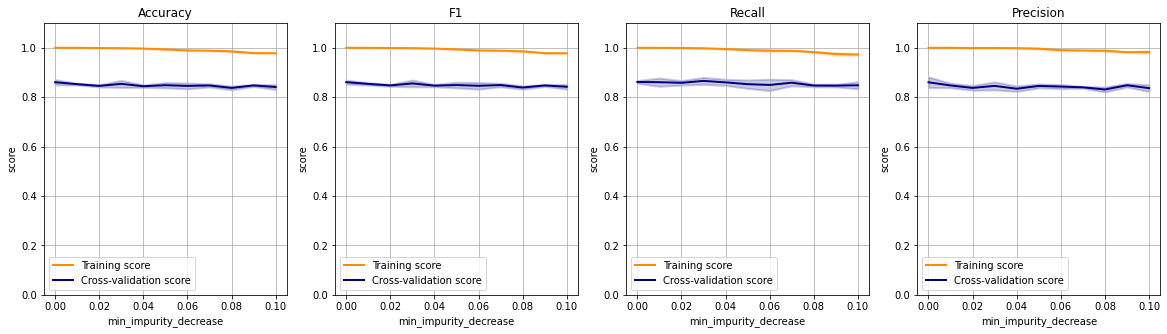

In [31]:
param_range = [ x*0.01 for x in range(0, 11)]

# optimize min samples leaf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

classifier = GradientBoostingClassifier(random_state=0, n_estimators=625)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='min_impurity_decrease', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=2, undersampling_ratio=1, 
                      x_axis_is_log=False)



# Performance

In [26]:
# Undersampling to 1:1 and iteration 10x
classifier = GradientBoostingClassifier(n_estimators=625, max_depth=9, random_state=0)
res = fit_and_score_iteratively(classifier, X, y, 1, iterations=3)
print(res)


a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.89110226 0.89141322 0.88718451 0.89580011 0.891106  ]


# Learning Curve

iteration 1
a=0.0, r=1, gamma=20.040858725761773
iteration 2
a=0.0, r=1, gamma=20.040858725761773


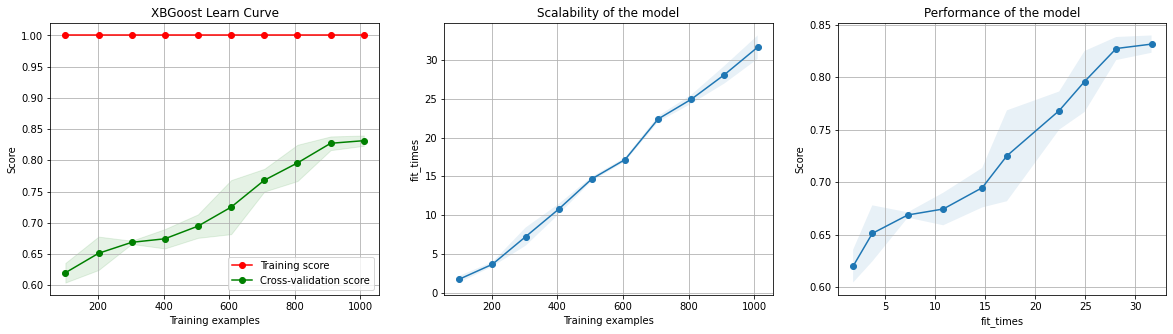

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = GradientBoostingClassifier(random_state=0, n_estimators=625, max_depth=9)
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
title = 'XBGoost Learn Curve'
results = plot_learning_curve(classifier, title, X_train, y_train, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=2,
                             undersampling=True)




In [5]:
print(results)

{'train_sizes': array([ 101,  202,  303,  404,  505,  606,  707,  808,  909, 1010]), 'train_scores_mean': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'train_scores_std': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'test_scores_mean': array([0.61999785, 0.65116736, 0.66872962, 0.67441094, 0.69469866,
       0.72512266, 0.76817507, 0.79587875, 0.82730778, 0.83151497]), 'test_scores_std': array([0.01564572, 0.02672092, 0.00255751, 0.01550004, 0.01879695,
       0.04327497, 0.01817507, 0.02904707, 0.01097115, 0.00824764]), 'fit_times_mean': array([ 1.76017529,  3.68043727,  7.23032755, 10.78373176, 14.68172175,
       17.15862262, 22.39132178, 24.93198699, 28.10019827, 31.63352031]), 'fit_times_std': array([0.42838651, 0.28267175, 1.16716903, 0.66566962, 0.27145571,
       0.25494254, 0.37899363, 0.56881922, 1.13617086, 1.51162535]), 'fit_times_train_size_ratio': 0.029226290471482987, 'fit_times_test_score_ratio': 22.371773714691255, 'score_times_test_size_ratio': 6.3482970401684